In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
# dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom
data = pd.read_csv(r'D:\Study Material\ML & DL\Data\mushrooms.csv')

data.T

,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
class,p,e,e,p,e,e,e,e,p,e,...,p,e,p,p,p,e,e,e,p,e
cap-shape,x,x,b,x,x,x,b,b,x,b,...,f,x,k,k,k,k,x,f,k,x
cap-surface,s,s,s,y,s,y,s,y,y,s,...,y,s,y,s,y,s,s,s,y,s
cap-color,n,y,w,w,g,y,w,w,w,y,...,c,n,n,e,n,n,n,n,n,n
bruises,t,t,t,t,f,t,t,t,t,t,...,f,f,f,f,f,f,f,f,f,f
odor,p,a,l,p,n,a,a,l,p,a,...,m,n,s,y,f,n,n,n,y,n
gill-attachment,f,f,f,f,f,f,f,f,f,f,...,a,a,f,f,f,a,a,a,f,a
gill-spacing,c,c,c,c,w,c,c,c,c,c,...,c,c,c,c,c,c,c,c,c,c
gill-size,n,b,b,n,b,b,b,b,n,b,...,b,b,n,n,n,b,b,b,n,b
gill-color,k,k,n,n,k,n,g,n,p,g,...,y,y,b,b,b,y,y,n,b,y


In [3]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
for col in data.columns:
    uniq = np.unique(data[col])
    print('{}: {} '.format(col, uniq))

# veil type shows only one variable indicating the correlation is the same among all other attributes
# so we can drop this column

class: ['e' 'p'] 
cap-shape: ['b' 'c' 'f' 'k' 's' 'x'] 
cap-surface: ['f' 'g' 's' 'y'] 
cap-color: ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y'] 
bruises: ['f' 't'] 
odor: ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y'] 
gill-attachment: ['a' 'f'] 
gill-spacing: ['c' 'w'] 
gill-size: ['b' 'n'] 
gill-color: ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y'] 
stalk-shape: ['e' 't'] 
stalk-root: ['?' 'b' 'c' 'e' 'r'] 
stalk-surface-above-ring: ['f' 'k' 's' 'y'] 
stalk-surface-below-ring: ['f' 'k' 's' 'y'] 
stalk-color-above-ring: ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y'] 
stalk-color-below-ring: ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y'] 
veil-type: ['p'] 
veil-color: ['n' 'o' 'w' 'y'] 
ring-number: ['n' 'o' 't'] 
ring-type: ['e' 'f' 'l' 'n' 'p'] 
spore-print-color: ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y'] 
population: ['a' 'c' 'n' 's' 'v' 'y'] 
habitat: ['d' 'g' 'l' 'm' 'p' 'u' 'w'] 


In [5]:
for col in data.columns: 
    if data[col].str.extract(r'([^a-z])').notnull().sum()[0] > 0:
        print(col + ': \n', data[col].str.extract(r'([^a-z])').value_counts())
    
# comment: seems like there is an unknown type '?' in stalk shape

stalk-root: 
 ?    2480
dtype: int64


In [6]:
# poison and edible data
p_data = data[data['class'] == 'p']
e_data = data[data['class'] == 'e']

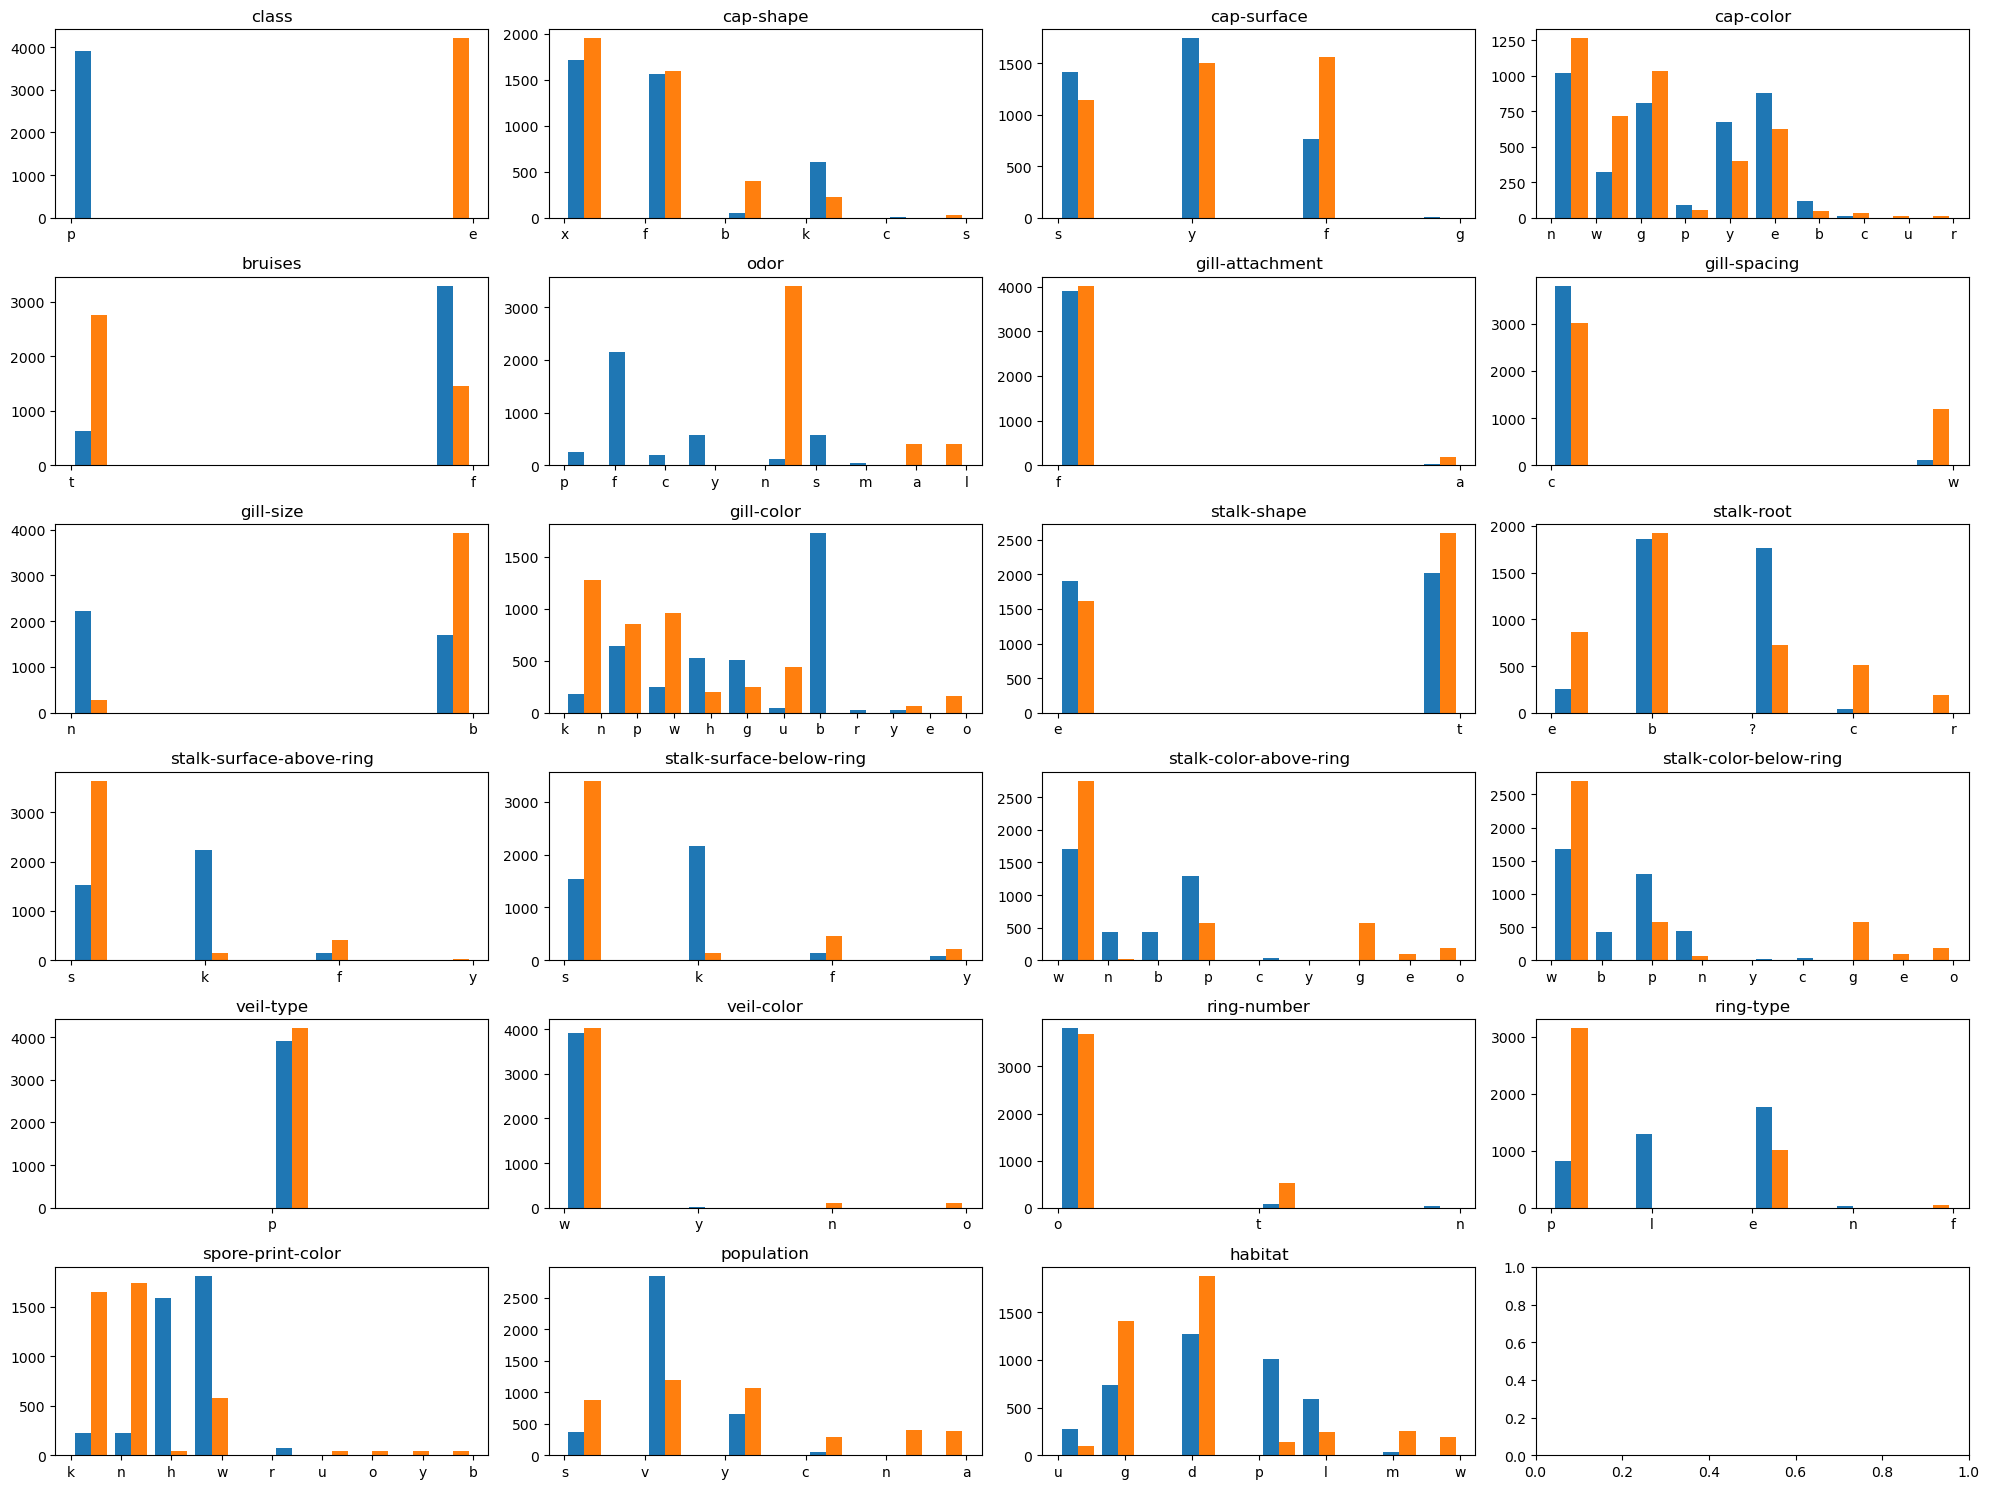

In [7]:
fig, ax = plt.subplots(6, 4, figsize = (20, 15))
for i, col in enumerate(data.columns):  
    plt.subplot(6, 4, i + 1)
    plt.hist([p_data[col], e_data[col]])
    plt.title(col)
plt.tight_layout()
plt.show()
    
# summary
# 1. the amount of poison and edible mushroom is almost the same
# 2. odor and spore-print-color shows significant difference between two classes
# 3. bruises, gill-size, gill-color, stalk-surface-above-ring, stalk-surface-below-ring show sufficient significant beside odor and spore-print-color


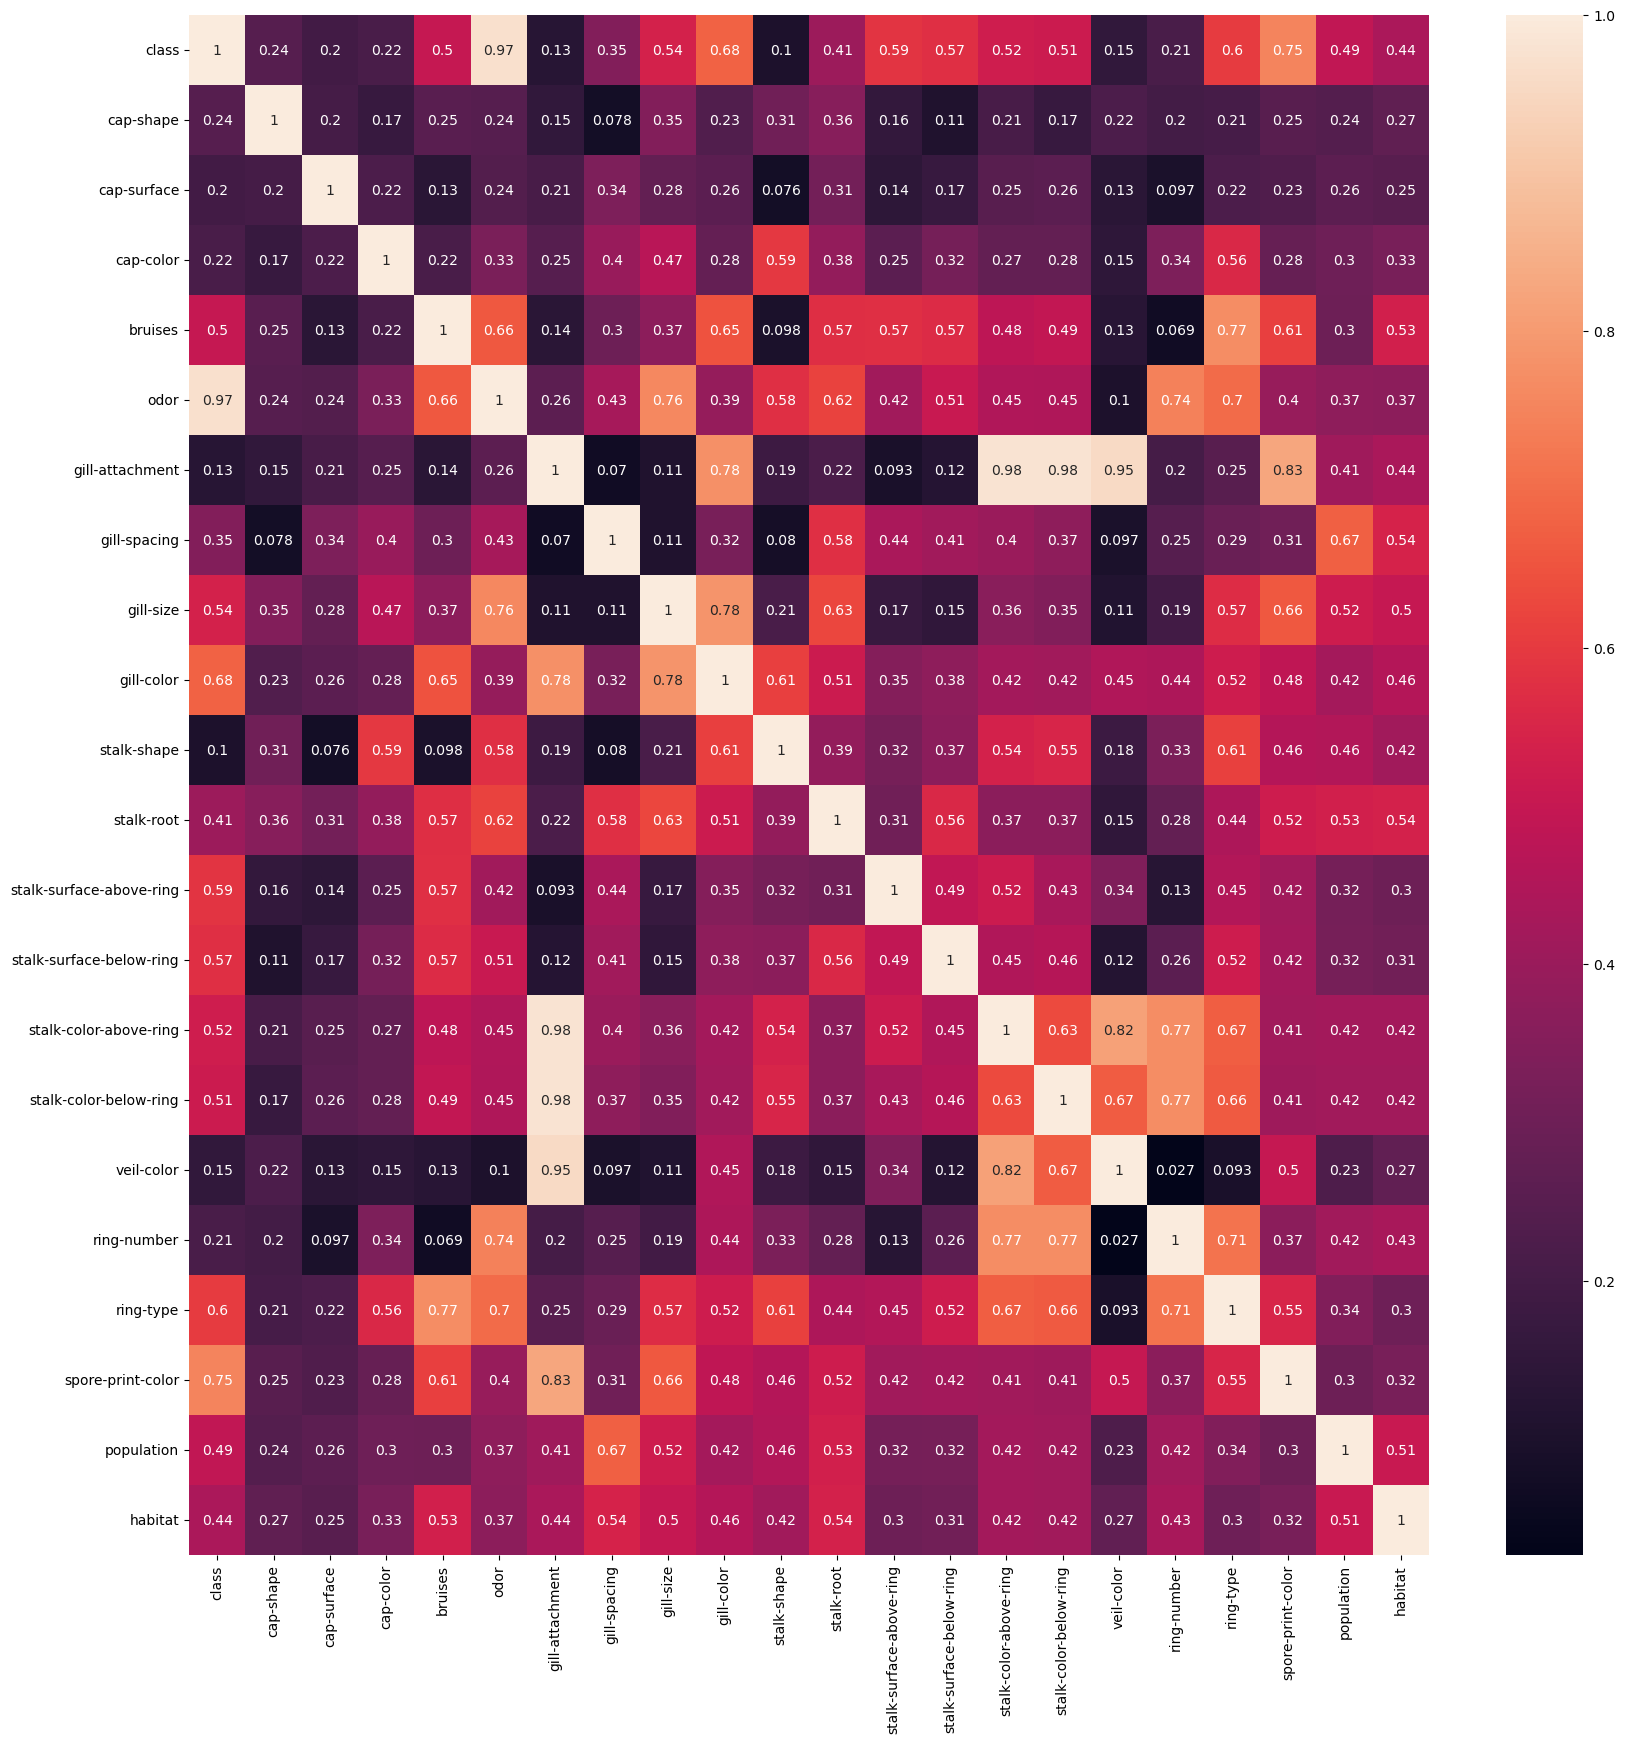

In [8]:
# correlation 
from scipy.stats import chi2, chi2_contingency

def cramers_v(x, y):
    ct_table = pd.crosstab(x, y) 

    chi2_stat, p_value, dof, expected = chi2_contingency(ct_table) 
    n = ct_table.sum().sum() 

    phi2 = chi2_stat / n
    r, k = ct_table.shape

    phi2corr = max(0, phi2 - ((k-1) * (r-1)) / (n-1))
    rcorr = r-((r-1) ** 2) / (n-1)
    kcorr = k-((k-1) ** 2) / (n-1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def create_matrix(df):
    r = c = len(df.columns) 
    matrix = np.zeros([r, c])
    for i, r_col in enumerate(df.columns):
        for j, c_col in enumerate(df.columns):
            matrix[i][j] = cramers_v(df[r_col], df[c_col])
            
    matrix = pd.DataFrame(matrix, columns = df.columns)
    matrix = matrix.set_index(df.columns)
    
    # drop veil-type
    matrix = matrix.drop(['veil-type'], axis = 1)
    matrix = matrix.drop(['veil-type'], axis = 0)
    return matrix
        
matrix = create_matrix(data)

plt.figure(figsize = (20, 20))
sns.heatmap(matrix, annot = True)
plt.show()

In [11]:
# since the data are all categorical, lets use KModes for the classification 
!pip install kmodes
from kmodes.kmodes import KModes

In [21]:
# actual classification 
from sklearn.model_selection import GridSearchCV, train_test_split

y = data['class']
x = data.drop(['class'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model = KModes(n_clusters = 2, n_init = 5, init = 'random') 
model.fit(x_train, y_train)
result = model.predict(x_test)

In [16]:
result

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [24]:
from sklearn.metrics import classification_report, accuracy_score 
y_true = pd.factorize(y_test)[0]

report = classification_report(y_true, result)
print(report)

acc = accuracy_score(y_true, result)
print('Accuracy: ' + str(acc)) 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1257
           1       1.00      0.78      0.88      1181

    accuracy                           0.89      2438
   macro avg       0.91      0.89      0.89      2438
weighted avg       0.91      0.89      0.89      2438

Accuracy: 0.894585726004922
